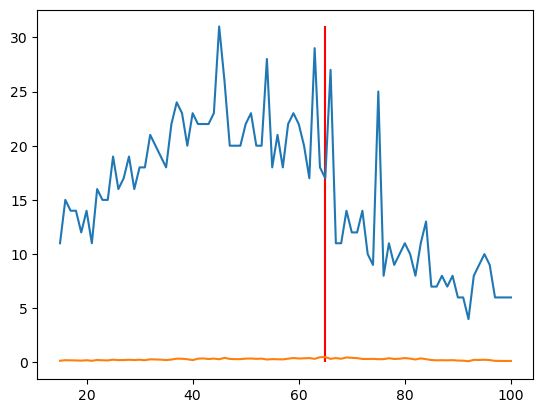

In [13]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

MODEL = 'cc3_bestAccuracy'
tree = ET.parse('/notebooks/Thesis/1_Preprocessing/annotations_reformatted.xml')
root = tree.getroot()

resultfiles = []
filelist = os.listdir(f'/notebooks/Thesis/results/{MODEL}')
for file in filelist:
    if file.endswith('.csv'):
        resultfiles.append(file)


filename = resultfiles[0]
videoid = filename[-10:-4]

videoinfo = root.find(f"./video[@taskid='{videoid}']")
tracks = videoinfo.find('tracks')

impactframes = []
for track in tracks:
    impactframes.append(int(track[0].attrib.get("frame")))

results = pd.read_csv(f'/notebooks/Thesis/results/{MODEL}/{filename}')

numframes = results.iloc[-1, 0] - results.iloc[0, 0] + 1
framenum = [0]*numframes
numpatches = [0]*numframes
numpositive = [0]*numframes
percentpositive = [0]*numframes
prevpatchnum = -1
j = -1

for i in range(len(results)):
    currpatchnum = results.iloc[i, 0]
    currpatchres = results.iloc[i, 3]

    if currpatchnum != prevpatchnum:
        j += 1
        framenum[j] = currpatchnum

    numpatches[j] += 1
    numpositive[j] += currpatchres

    prevpatchnum = currpatchnum

for i in range(len(percentpositive)):
    percentpositive[i] = numpositive[i] / numpatches[i]

fig = plt.figure()

ax1 = fig.add_subplot()
ax1.vlines(x = impactframes, ymin = 0, ymax = max(numpositive), colors = 'red')
ax1.plot(framenum, numpositive)

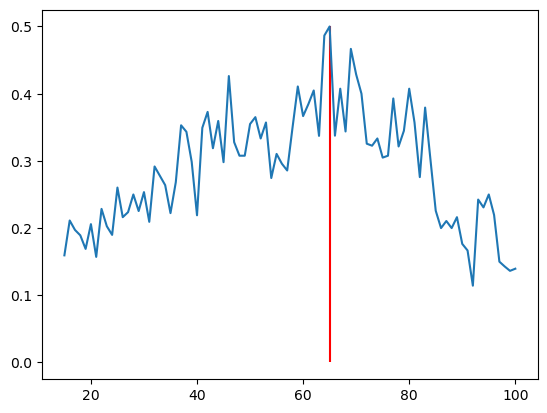

In [15]:
fig = plt.figure()

ax1 = fig.add_subplot()
ax1.vlines(x = impactframes, ymin = 0, ymax = max(percentpositive), colors = 'red')
ax1.plot(framenum, percentpositive)